# Ham or Spam - gerçek mesaj veya reklam/istenmeyen mesaj

In [177]:
#!pip install wordcloud

In [178]:
import warnings
warnings.filterwarnings("ignore")

In [179]:
import pandas as pd

In [180]:
df=pd.read_csv('spam.csv',encoding='latin-1') #utf hatası yüzünden encoding kısmını yazdık

In [181]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [182]:
df=df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1) #bu satırlar gereksiz old için siliyoruz
#satır olsaydı axis 0, sütun olunca aksis 1
#df=df[['v1','v2']] yazmak da aynı şey

In [183]:
df.columns=['Class',"Text"]

In [184]:
df.head() 
#mesaj spam mi değil mi o yüzden bu classification prob oluyo

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='Class', ylabel='count'>

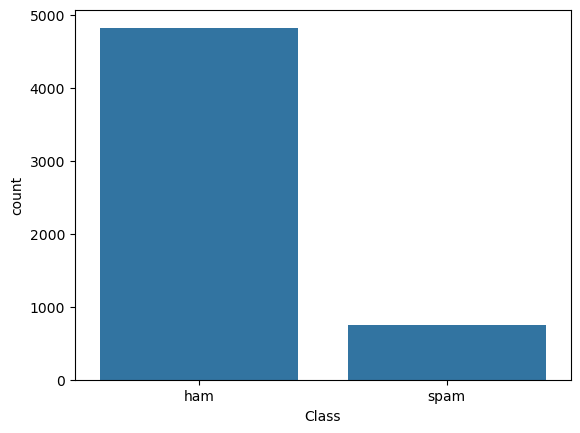

In [185]:
import seaborn as sns
sns.countplot(x=df['Class'])

In [186]:
df.shape

(5572, 2)

In [187]:
df['Class'].value_counts()

Class
ham     4825
spam     747
Name: count, dtype: int64

In [188]:
d={'ham':0,'spam':1}
df['Class']=df['Class'].map(d)
#map for döngüsünün moderm hali

In [189]:
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


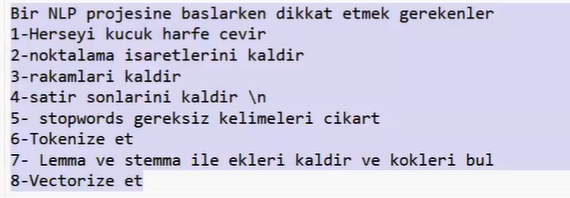

In [190]:
df['Text']=df['Text'].str.lower()

In [191]:
df['Text']=df['Text'].str.replace('[^\w\s]','', regex=True) #noktalama is sil

In [192]:
df['Text']=df['Text'].str.replace('\n','', regex=True) #satır başına inmeyi siler

In [193]:
df['Text']=df['Text'].str.replace(r'\d+','', regex=True) #rakamları sil

In [194]:
df['Text']=df['Text'].str.replace('\r','', regex=True) #satır başına inmeyi siler

In [195]:
df.head(10)

,Class,Text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
5,1,freemsg hey there darling its been weeks now ...
6,0,even my brother is not like to speak with me t...
7,0,as per your request melle melle oru minnaminun...
8,1,winner as a valued network customer you have b...
9,1,had your mobile months or more u r entitled t...


In [196]:
from wordcloud import WordCloud #kelimelerden foto yapıyor
from wordcloud import STOPWORDS #tekrar eden gereksiz kelimeleri kaldırmak için
from PIL import Image #fotoları resimleri okur
import numpy as np
import matplotlib.pyplot as plt

In [225]:
#dry - dont repeat yourself
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('j.png')) #olmadı mask
    wc=WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=mask) 
    wc.generate(''.join(data)) #kelimeleri alıyor en çok tekrar edeni en büyük yazıyor
    plt.imshow(wc)
    plt.axis('off')

In [226]:
''.join(df['Text'])

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore watok lar joking wif u onifree entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply oversu dun say so early hor u c already then saynah i dont think he goes to usf he lives around here thoughfreemsg hey there darling its been  weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send å to rcveven my brother is not like to speak with me they treat me like aids patentas per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press  to copy your friends callertunewinner as a valued network customer you have been selected to receivea å prize reward to claim call  claim code kl valid  hours onlyhad your mobile  months or more u r entitled to update to the latest colour mobiles with camera for free call the mobile update co free on im gonna be ho

In [227]:
ham=df[df['Class' ] == 0]['Text']
spam=df[df['Class' ] == 1] ['Text']

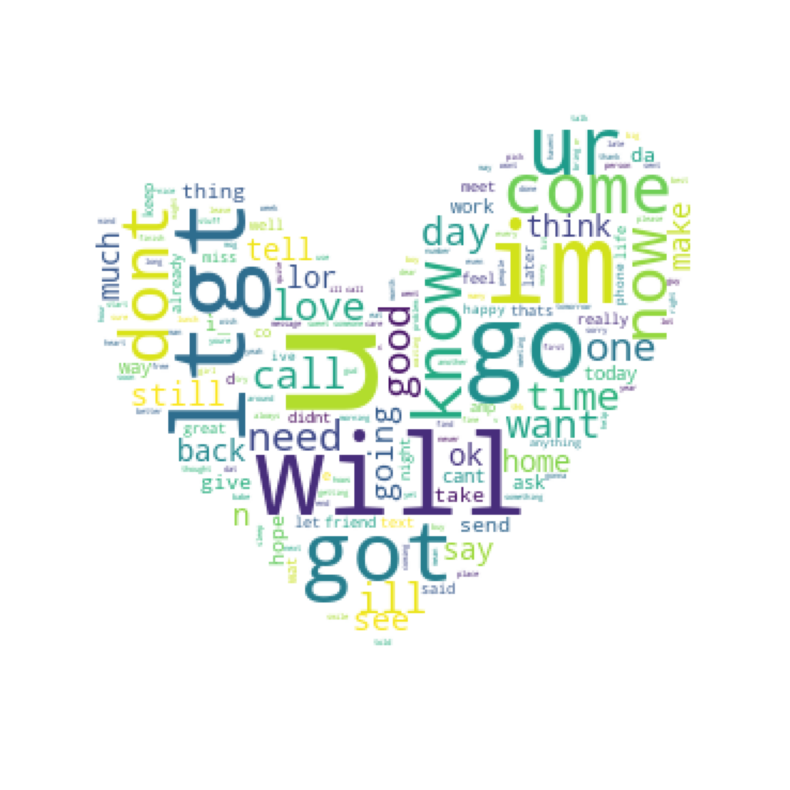

In [228]:
wc(ham,'white')

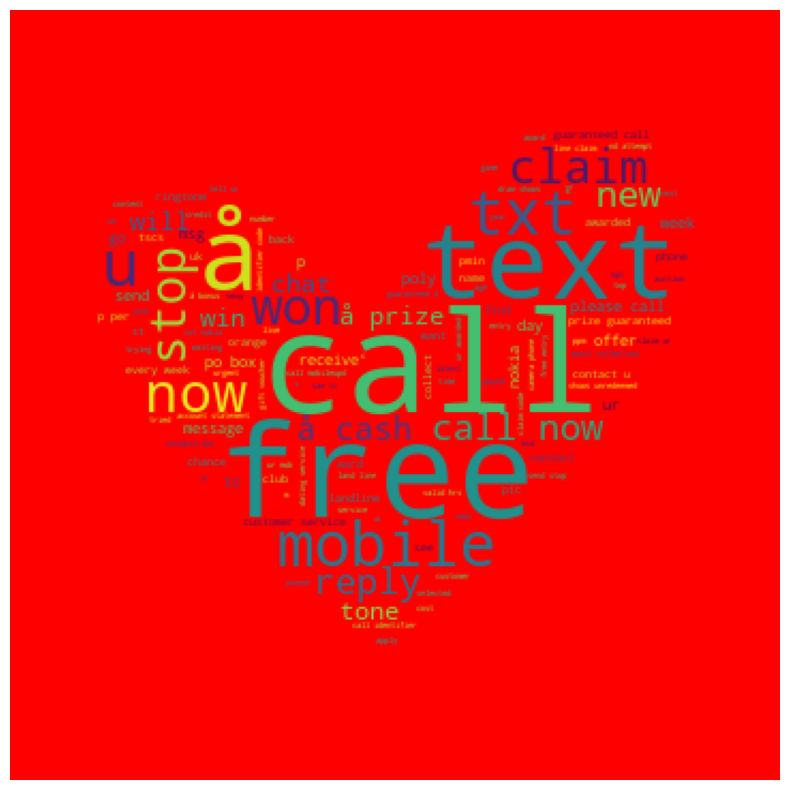

In [229]:
wc(spam,'red')

In [202]:
# ML

In [203]:
x=df["Text"]
y=df ['Class']

In [204]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [205]:
from sklearn. feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk. stem import PorterStemmer
pr=PorterStemmer()

In [206]:
def lemmafn(text): #ekleri kaldırıp kökleri bulan fonk
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [207]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),analyzer=lemmafn) # parantez içinde max_features=10000,yazmaya gerek yok

In [208]:
x=vect.fit_transform(x)

In [209]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42, test_size=0.20)

In [210]:
nb=MultinomialNB()
model=nb.fit(x_train,y_train)
tahmin=model.predict(x_test)

In [211]:
accuracy_score(tahmin, y_test)

0.9766816143497757

In [212]:
tahmin

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)